<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

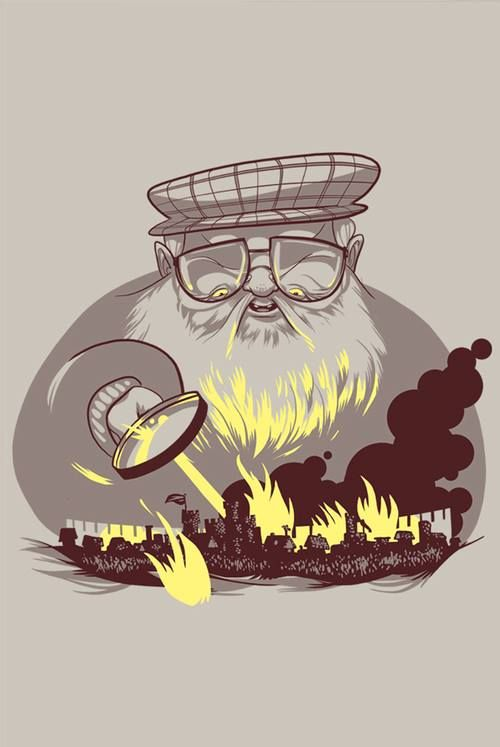

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder



**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
data_train = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 25 artists>

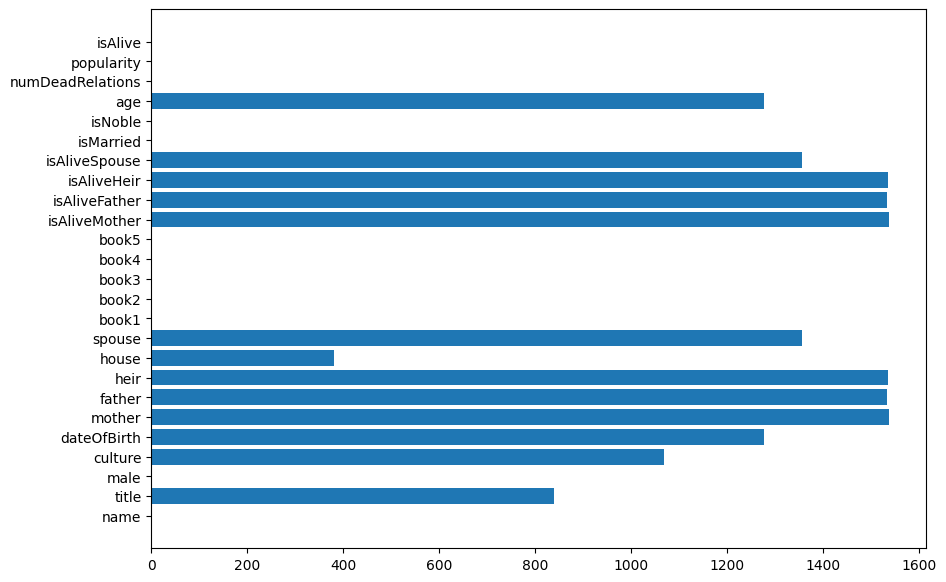

In [4]:
data = data_train.isna().sum()

plt.figure(figsize=(10,7))

plt.barh(data.index, data.values)

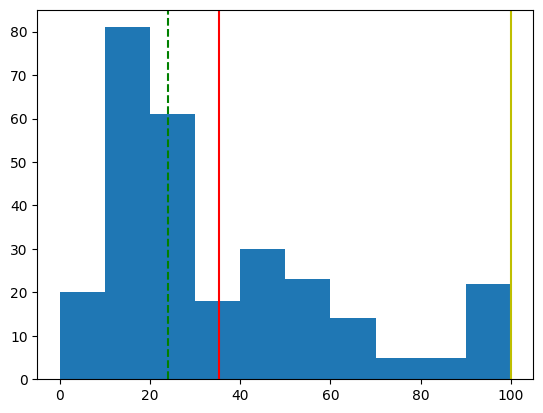

In [5]:
plt.hist(data_train['age'])
mean_Age = np.mean(data_train['age'].dropna().values)
median_Age = np.quantile(data_train['age'].dropna().values,q=0.5)
mode_Age = data_train['age'].dropna().mode()[0]

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')
plt.axvline(x=mode_Age, color='y', linestyle = '-', label='mode')

plt.show()

In [6]:
def replace_nan_instr(df):
    for feature in string_features:
        df[feature] = df[feature].fillna('unknown')
        df[feature] = df[feature].str.lower()
    return df


def replace_nan_innumber(df):
    for feature in numeric_features:
        df[feature] = df[feature].fillna(df[feature].median())
    return df


def replace_nan_inbinary(df) :
    for feature in binary_features:
        df[feature] = df[feature].fillna(0.5)
    return df

In [7]:
string_features = ['title', 'culture', 'house', 'spouse']
numeric_features = ['age', 'numDeadRelations', 'popularity', 'dateOfBirth']
binary_features = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather','isAliveSpouse','isAliveHeir', 'isMarried', 'isNoble']

In [8]:
data_train = data_train[data_train['isAlive'].notna()]

In [9]:
data_train = replace_nan_instr(data_train)
data_test = replace_nan_instr(data_test)

data_train =replace_nan_innumber(data_train)
data_test = replace_nan_innumber(data_test)

data_train = replace_nan_inbinary(data_train)
data_test = replace_nan_inbinary(data_test)

In [10]:
# видим много не заполненных признаков, их удаляем в общей функции 

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [11]:
def new_age(data):
    df=data[['age','dateOfBirth']]
    s = []
    for i in range(len(df)):
        if df.age.iloc[i] + df.dateOfBirth.iloc[i] in [305,304]:
            s.append(1)
        else:
            s.append(0)
    data['new_age'] = np.array(s)

new_age(data_train)
new_age(data_test)

In [12]:
def f(value):
    if value < 0.5:
        return 0
    else:
        return 1

data_train['isPopular'] = data_train['popularity'].map(f)
data_test['isPopular'] = data_test['popularity'].map(f)

def f1(value):
    if value > 0:
        return 1
    else:
        return 0

data_train['boolDeadRelations'] = data_train['numDeadRelations'].map(f1)
data_test['boolDeadRelations'] = data_test['numDeadRelations'].map(f1)



In [13]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari', 'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [14]:
culture_map = {name: key for key, values in cult.items() for name in values}
def simplify_culture(culture_name):
    return culture_map.get(culture_name, culture_name)

data_train['culture'] = data_train['culture'].apply(simplify_culture)
data_test['culture'] = data_test['culture'].apply(simplify_culture)



**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

<Axes: >

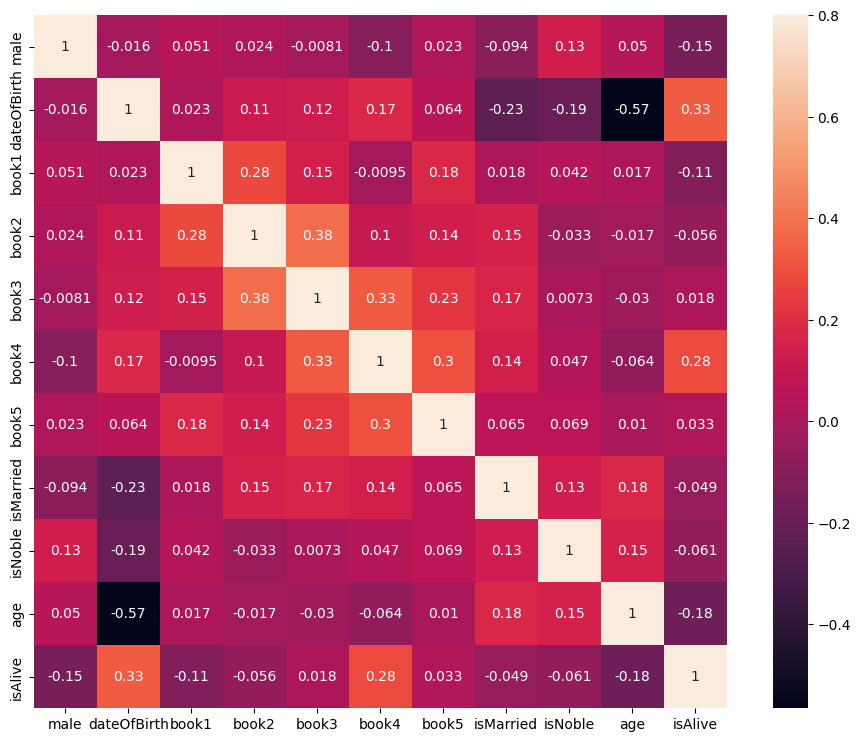

In [15]:
#df_train.info()
corrmat = data_train[['male', 'dateOfBirth','book1','book2','book3','book4','book5','isMarried','isNoble','age','isAlive']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)


In [16]:
# тут считаем для каждой культуры, дома и титула процент умерших, принадлежащих к нему
# считаем массивы с названиями непопулярных домой, культур и титулов, чтобы в общей функции их объединить в одну

In [17]:

data_cult_per = data_train.groupby('culture')['isAlive'].agg(['sum', 'count'])
data_cult_per['per'] = data_cult_per['sum'] / data_cult_per['count']
culture_per_dict = dict(zip(data_cult_per.index, data_cult_per['per']))
small_cult_ind = data_cult_per[data_cult_per['count'] <= 13].index


In [18]:
data_title_per = data_train.groupby('title')['isAlive'].agg(['sum', 'count'])
data_title_per['per'] = data_title_per['sum'] / data_title_per['count']
title_per_dict = dict(zip(data_title_per.index, data_title_per['per']))
small_title_index = data_title_per[data_title_per['count'] < 8].index


In [19]:
data_house_per = data_train.groupby('house')['isAlive'].agg(['sum', 'count'])
data_house_per['per'] = data_house_per['sum'] / data_house_per['count']
house_per_dict = dict(zip(data_house_per.index, data_house_per['per']))
small_houses_indexes = data_house_per[data_house_per['count'] < 50].index


In [20]:
def last_book(row):
    list_ = [row['book1'], row['book2'], row['book3'], row['book4'], row['book5']]
    right_index = 4
    while right_index >= 0 and list_[right_index] == 0:
        right_index -= 1
    return right_index

data_train['last_book'] = data_train.apply(last_book, axis=1)
data_test['last_book'] = data_test.apply(last_book, axis=1)
data_train.drop(columns=[ 'book1', 'book2','book3','book4','book5'], inplace = True)
data_test.drop(columns=[ 'book1', 'book2','book3','book4','book5'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Целевая переменная 'isAlive' количественная.

Количество экземпляров в каждом классе:
isAlive
1    1212
0     345
Name: count, dtype: int64


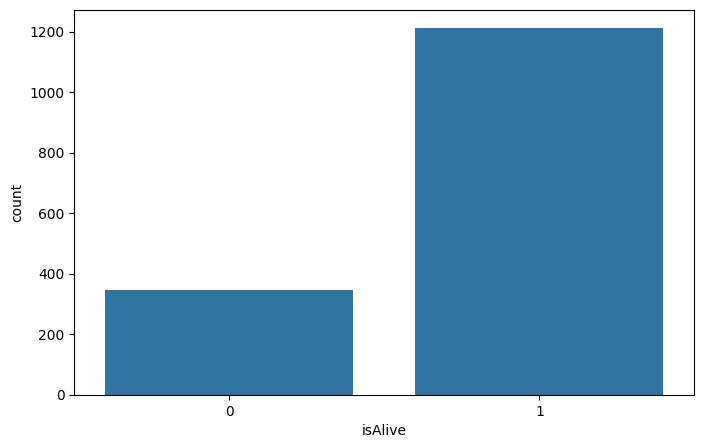


Датасет сбалансирован по классам


In [21]:
import seaborn as sns

target = 'isAlive'

if data_train[target].dtype == 'object' or data_train[target].dtype.name == 'category':
    print(f"Целевая переменная '{target}' категориальная.")
else:
    print(f"Целевая переменная '{target}' количественная.")

class_counts = data_train[target].value_counts()
print("\nКоличество экземпляров в каждом классе:")
print(class_counts)

plt.figure(figsize=(8, 5))
sns.countplot(x=target, data=data_train)
plt.show()

if class_counts.min() / class_counts.max() < 0.2:
    print("\nДатасет несбалансирован по классам")
else:
    print("\nДатасет сбалансирован по классам")

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [22]:
# общая функция

In [23]:
def preprocess_data(data):
    
    
    # не существенные признаки
    data.drop(columns=['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'popularity',
                       'numDeadRelations', 'spouse', 'isAliveSpouse'], inplace=True)

    # считаем для персонажа вероятности выжить в зависимости от дома, культуры и титула
    data['culture_prob'] = data['culture'].apply(lambda x: culture_per_dict.get(x, 0.5))
    data['title_prob'] = data['title'].apply(lambda x: title_per_dict.get(x, 0.5))
    data['house_prob'] = data['house'].apply(lambda x: house_per_dict.get(x, 0.5))
    # объединяем непопулярные в один
    data['house'] = data['house'].replace(small_houses_indexes, 'small_house')
    data['title'] = data['title'].replace(small_title_index, 'small_title')
    # убираем признаки которые сильно коррелируют с другими, это было видно в таблице корреляции ниже
    data.drop(columns=['isPopular', 'culture'], inplace=True)
    return data

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [24]:
'''from sklearn.preprocessing import OneHotEncoder

df_train = data_train
df_train = preprocess_data(df_train)
categorical_features = ['title', 'house', 'last_book']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_train_categorical = pd.DataFrame(ohe.fit_transform(df_train[categorical_features]),
                                      columns=ohe.get_feature_names_out(categorical_features), index=df_train.index)
df_train = pd.concat([df_train.drop(columns=categorical_features), df_train_categorical], axis=1)

corr_series = df_train.drop(columns=['name']).corr()['isAlive'].apply(lambda x: abs(x)).sort_values()
useless_features = corr_series[corr_series < 0.1].index
print(useless_features)
df_train.drop(columns=['name']).drop(
    columns=useless_features).corr()  #['isAlive'].apply(lambda x: abs(x)).sort_values() '''

"from sklearn.preprocessing import OneHotEncoder\n\ndf_train = data_train\ndf_train = preprocess_data(df_train)\ncategorical_features = ['title', 'house', 'last_book']\nohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)\ndf_train_categorical = pd.DataFrame(ohe.fit_transform(df_train[categorical_features]),\n                                      columns=ohe.get_feature_names_out(categorical_features), index=df_train.index)\ndf_train = pd.concat([df_train.drop(columns=categorical_features), df_train_categorical], axis=1)\n\ncorr_series = df_train.drop(columns=['name']).corr()['isAlive'].apply(lambda x: abs(x)).sort_values()\nuseless_features = corr_series[corr_series < 0.1].index\nprint(useless_features)\ndf_train.drop(columns=['name']).drop(\n    columns=useless_features).corr()  #['isAlive'].apply(lambda x: abs(x)).sort_values() "

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [25]:
# тут сразу обрабатываем и data_train и data_test
from sklearn.model_selection import train_test_split
useless_features = ['house_small_house', 'title_ser', 'house_house stark',"title_lord commander of the night's watch", 'title_septon',       'title_lady', 'title_lord', 'title_winterfell', 'last_book_4',       'house_unknown', 'title_cupbearer', 'title_maester', 'title_septa',     'title_king in the north', 'isMarried', 'last_book_0', 'title_unknown','isNoble', 'title_archmaester', 'last_book_1', 'house_house frey', 'title_small_title', 'last_book_2']
data_train = preprocess_data(data_train)
data_test = preprocess_data(data_test)

X = data_train.drop(columns=['name', 'isAlive'])
y = data_train['isAlive']
data_test.drop(columns=['name'], inplace=True)

categorical_features = ['title', 'house', 'last_book']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical = pd.DataFrame(ohe.fit_transform(X[categorical_features]),
                             columns=ohe.get_feature_names_out(categorical_features), index=X.index)
X = pd.concat([X.drop(columns=categorical_features), X_categorical], axis=1)
data_test_categorical = pd.DataFrame(ohe.transform(data_test[categorical_features]),
                                     columns=ohe.get_feature_names_out(categorical_features), index=data_test.index)
X.drop(columns=useless_features, inplace=True)
data_test = pd.concat([data_test.drop(columns=categorical_features), data_test_categorical], axis=1)
data_test.drop(columns=useless_features, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [26]:
data_test.shape, X.shape

((389, 12), (1557, 12))

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [27]:
# все задания в одной клетке. Еще попробуем немного подбирать лучшие параметры с помощью gridSearchCv

In [28]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train, y_train)
y_pred = ada_boost_classifier.predict(X_test)

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_random = random_forest_classifier.predict(X_test)

kneighbors_classifier = KNeighborsClassifier()
kneighbors_classifier.fit(X_train, y_train)
y_pred = kneighbors_classifier.predict(X_test)

gaussian_process_classifier = GaussianProcessClassifier()
gaussian_process_classifier.fit(X_train, y_train)
y_pred = gaussian_process_classifier.predict(X_test)

gaussian_NB = GaussianNB()
gaussian_NB.fit(X_train, y_train)
y_pred = gaussian_NB.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [30]:
X

,male,dateOfBirth,age,new_age,boolDeadRelations,culture_prob,title_prob,house_prob,title_princess,house_night's watch,last_book_-1,last_book_3
S.No,,,,,,,,,,,,
1,1,272.0,24.0,0,1,0.781104,0.80000,0.803150,0.0,0.0,1.0,0.0
2,1,208.0,97.0,1,1,0.700000,1.00000,0.898876,0.0,0.0,0.0,0.0
3,1,272.0,24.0,0,0,0.781104,0.77451,1.000000,0.0,0.0,0.0,1.0
4,0,82.0,23.0,0,0,0.781104,0.00000,0.636364,0.0,0.0,1.0,0.0
5,0,276.0,29.0,1,0,0.952381,1.00000,1.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,272.0,24.0,0,0,0.781104,1.00000,0.803150,0.0,0.0,0.0,1.0
1554,0,272.0,24.0,0,0,0.781104,0.80000,0.803150,0.0,0.0,0.0,0.0
1555,1,272.0,24.0,0,0,0.781104,0.80000,0.428571,0.0,0.0,0.0,0.0


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

for i in [ada_boost_classifier, random_forest_classifier, kneighbors_classifier,gaussian_process_classifier,gaussian_NB,svc,decision_tree_classifier]:
    y_pred = i.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy {i}: %.4f" % accuracy)

Accuracy : 0.8658
Accuracy AdaBoostClassifier(): 0.8774
Accuracy RandomForestClassifier(): 0.8405
Accuracy KNeighborsClassifier(): 0.8268
Accuracy GaussianProcessClassifier(): 0.8813
Accuracy GaussianNB(): 0.7821
Accuracy SVC(): 0.8191
Accuracy DecisionTreeClassifier(): 0.8191


Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

Аналогичным образом посчитайте метрику accuracy для остальных моделей

Выберите лучшую модель.

### Файл `submission.csv`

In [33]:
# обучим на всей выборке и еще немного поподбираем параметры

In [34]:
gaussian_process_classifier = RandomForestClassifier()
gaussian_process_classifier.fit(X, y)
y_pred = gaussian_process_classifier.predict(data_test)

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [35]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [36]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [37]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [38]:
submission['isAlive'] = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [39]:
submission.to_csv("new_submission101.csv", index=False)